In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_69839_I')

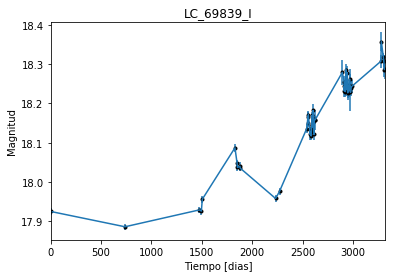

In [2]:
data = np.genfromtxt('LC_69839_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_69839_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

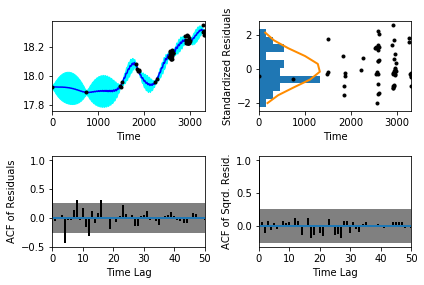

In [5]:
sample.assess_fit()

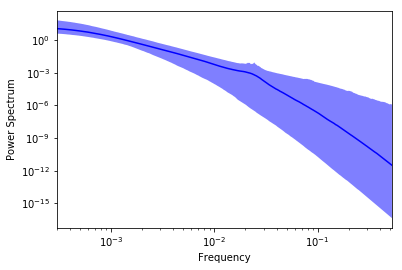

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_69839_I')

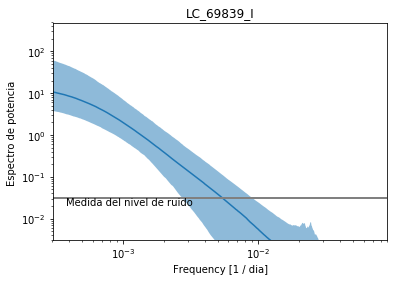

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_69839_I')

Text(0.5,1,'Prediccion , valor esperado LC_69839_I')

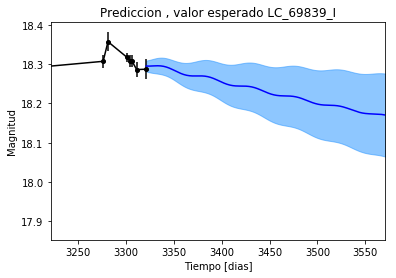

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_69839_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_69839_I')

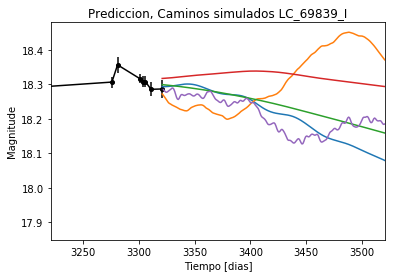

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_69839_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_69839_I')

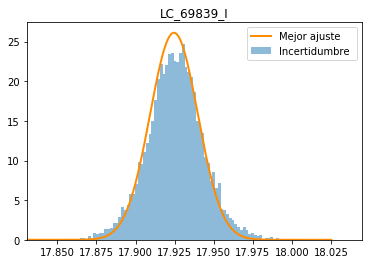

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_69839_I')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_I')

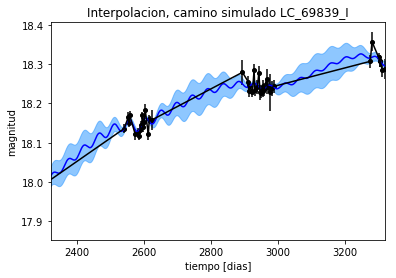

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_I')

Text(0.5,1,'Interpolacion, camino simulado LC_69839_I')

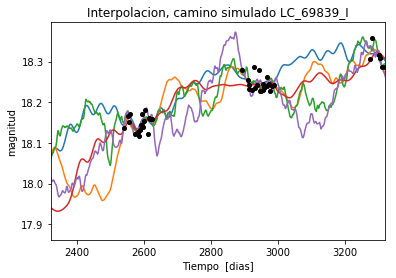

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_69839_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 191.582649763
Median: 0.0121870463453
Standard deviation: 0.202273769803
68% credibility interval: [ 0.00060617  0.19871388]
95% credibility interval: [  3.36817106e-04   7.89240559e-01]
99% credibility interval: [  3.09085375e-04   9.94237268e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 655.766830387
Median: 0.00148139825086
Standard deviation: 0.0664801600697
68% credibility interval: [ 0.000399    0.03412009]
95% credibility interval: [ 0.00031169  0.18647606]
99% credibility interval: [  3.03072076e-04   4.72440917e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 451.433732204
Median: 0.0122878383678
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 260.146569537
Median: 147.676885812
Standard deviation: 2.34053781645
68% credibility interval: [ 145.21604363  149.75135695]
95% credibility interval: [ 142.70872309  151.7941572 ]
99% credibility interval: [ 140.52119009  152.40522547]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 325.0280652
Median: 0.422067767631
Standard deviation: 2.08080694014
68% credibility interval: [ 0.02314674  3.38917885]
95% credibility interval: [ 0.01092551  7.08730194]
99% credibility interval: [  9.17013657e-03   9.28997227e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 323.787208986
Median: 0.379385513725
Standard deviation: 8.54783945423
68% credibility interval: [ 0.02183287  7.66403095]
95% credibility interval: [  9.177

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 13466.7604045
Median: 4.18724149126e-11
Standard deviation: 7.99360031322e+54
68% credibility interval: [  1.67460819e-28   7.39557584e-03]
95% credibility interval: [  3.47944757e-47   8.29740240e+01]
99% credibility interval: [  1.09749916e-58   1.55083486e+02]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1609.82227475
Median: 18.0456882595
Standard deviation: 0.0822234963989
68% credibility interval: [ 17.96983946  18.1138433 ]
95% credibility interval: [ 17.86848991  18.19595192]
99% credibility interval: [ 17.76664541  18.2718602 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 257.428649035
Median: 0.0235754408294
Standard deviation: 0.241151876476
68% credibility interval: [ 0.          0.30678012]
95% credibility interval: [ 0.          0.89866077]
99% credibility interval: [ 0.          1.00676596]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 257.428649035
Median: 0.0235754408294
Standard deviation: 0.241151876476
68% credibility interval: [ 0.          0.30678012]
95% credibility interval: [ 0.          0.89866077]
99% credibility interval: [ 0.          1.00676596]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 468.026971385
Median: 0.0
Standard deviation: 0.000186642096634
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 260.146569537
Median: 147.676885812
Standard deviation: 2.34053781645
68% credibility interval: [ 145.21604363  149.75135695]
95% credibility interval: [ 142.70872309  151.7941572 ]
99% credibility interval: [ 140.52119009  152.40522547]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 543.108399804
Median: 0.0196476632208
Standard deviation: 0.0251345130438
68% credibility interval: [ 0.01133443  0.03867112]
95% credibility interval: [ 0.00774588  0.08752778]
99% credibility interval: [ 0.0063164   0.14900188]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 653.164305979
Median: 1.10241688045
Standard deviation: 0.218109255906
68% credibility interval: [ 0.92305181  1.34511197]
95% credibility interval: [ 0.79769168  1.64481711]
99% credibility interval: [ 0.71666521  1.82330567]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1988.39361825
Median: 0.000131710644728
Standard deviation: 0.0732658577306
68% credibility interval: [  2.30299872e-06   5.61502445e-03]
95% credibility interval: [  5.73195042e-07   9.72914031e-02]
99% credibility interval: [  4.58284566e-08   4.13065086e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 191.582649763
Median: (-0.0765734705344+0j)
Standard deviation: 1.97764597997
68% credibility interval: [-1.24855611-1.21856252j -0.00380869-0.13988255j]
95% credibility interval: [ -4.95894469e+00-4.4470057j   -2.11628429e-03-0.14826525j]
99% credibility interval: [ -6.24697699e+00+0.j          -1.94204069e-03-0.19171417j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 655.766830387
Median: (-0.00930789972391+1.27398396255j)
Standard deviation: 1.57172394379
68% credibility interval: [-0.21438285+3.02417165j -0.00250701+0.j        ]
95% credibility interval: [-1.17166363+5.6395062j  -0.00195838+5.74562179j]
99% credibility interval: [ -2.96843383e+00+1.6011539j  -1.90425801e-03+0.j       ]
Posterior summary for param